# Libraries

In [1]:
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall, Precision
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
warnings.filterwarnings('ignore')

# Model

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2, 
        height_shift_range=0.2,
        brightness_range=[0.4,1.5],
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train = train_datagen.flow_from_directory(
        '/data/train/',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='binary',
        seed=123)

Found 5216 images belonging to 2 classes.


In [6]:
test = test_datagen.flow_from_directory(
        '/data/test/',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='binary',
        seed=123)

Found 624 images belonging to 2 classes.


In [7]:
validation = val_datagen.flow_from_directory(
        '/data/val/',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='binary',
        seed=123)

Found 16 images belonging to 2 classes.


In [8]:
cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(128,128,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))

cnn.add(Dense(units=1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [9]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), Recall()])

In [10]:
cnn.fit_generator(train, epochs=10, validation_data=test)

Epoch 1/10


2023-10-30 17:31:59.017954: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /Apple

163/163 [==============================] - ETA: 0s - loss: 1.4744 - precision: 0.8194 - recall: 0.8795

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

163/163 [==============================] - 74s 418ms/step - loss: 1.4744 - precision: 0.8194 - recall: 0.8795 - val_loss: 0.7241 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 2/10
163/163 [==============================] - 63s 388ms/step - loss: 0.3662 - precision: 0.8680 - recall: 0.8981 - val_loss: 0.7130 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/10
163/163 [==============================] - 65s 396ms/step - loss: 0.3577 - precision: 0.8786 - recall: 0.8911 - val_loss: 0.4933 - val_precision: 0.7867 - val_recall: 0.7564
Epoch 4/10
163/163 [==============================] - 64s 391ms/step - loss: 0.3333 - precision: 0.8938 - recall: 0.9037 - val_loss: 0.4467 - val_precision: 0.8417 - val_recall: 0.8179
Epoch 5/10
163/163 [==============================] - 67s 410ms/step - loss: 0.3120 - precision: 0.9012 - recall: 0.9084 - val_loss: 0.4337 - val_precision: 0.8677 - val_recall: 0.8744
Epoch 6/10
163/163 [==============================] - 64s 392ms/step - loss: 0.3362 - 

In [11]:
result_t = cnn.evaluate(validation)

1/1 [==============================] - 0s 173ms/step - loss: 1.7431 - precision: 0.5714 - recall: 1.0000


In [12]:
cnn.save('/model/cnn.keras')

In [13]:
del cnn

# Predict

In [14]:
cnn = load_model('/model/cnn.keras')

In [ ]:
normal_path = '/data/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'
pneumonia_path = '/data/val/PNEUMONIA/person1950_bacteria_4881.jpeg'

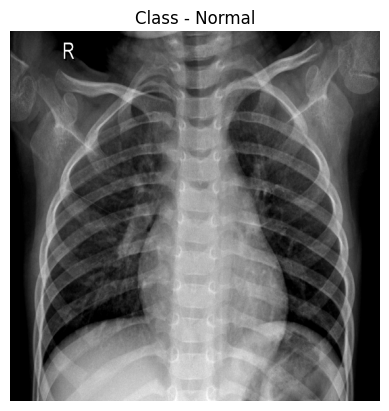

In [26]:
plt.title(f'Class - Normal')
plt.axis('off')
plt.imshow(image.load_img(normal_path, target_size=(1024,1024)), cmap='gray')

In [21]:
normal = image.load_img(normal_path, target_size=(128,128))
normal = image.img_to_array(normal)
normal = normal/255
normal = np.expand_dims(normal, axis=0)
cnn.predict(normal) # 40%

1/1 [==============================] - 0s 22ms/step


array([[0.40185657]], dtype=float32)

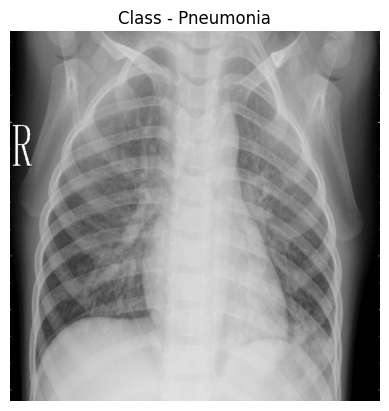

In [27]:
plt.title(f'Class - Pneumonia')
plt.axis('off')
plt.imshow(image.load_img(pneumonia_path, target_size=(1024,1024)), cmap='gray')

In [22]:
pneumonia = image.load_img(pneumonia_path, target_size=(128,128))
pneumonia = image.img_to_array(pneumonia)
pneumonia = pneumonia/255
pneumonia = np.expand_dims(pneumonia, axis=0)
cnn.predict(pneumonia) # 99%

1/1 [==============================] - 0s 18ms/step


array([[0.997663]], dtype=float32)